#### Setting the Working Directory

In [303]:
import os
os.chdir('C:\\Users\\sraho\\OneDrive\\Desktop\\A2\\Data')

In [304]:
os.getcwd()

'C:\\Users\\sraho\\OneDrive\\Desktop\\A2\\Data'

#### 1. Importing the data

In [305]:
import pandas as pd
ipl_bbb=pd.read_csv('IPL_ball_by_ball_updated till 2024.csv',low_memory=False)
ipl_salary=pd.read_excel('IPL SALARIES 2024.xlsx')

In [306]:
ipl_bbb.head()

,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
0,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.1,P Kumar,SC Ganguly,BB McCullum,0,1,legbyes,1,1/0,0,NaN,NaN,NaN
1,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,1,1/0,0,NaN,NaN,NaN
2,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,1,wides,2,2/0,0,NaN,NaN,NaN
3,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.3,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN
4,335982,18-04-2008,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.4,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN


In [307]:
ipl_salary.head()

,Player,Salary,Rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN
2,Axar Patel,9 crore,900,0,NaN
3,David Warner,6.25 crore,625,1,NaN
4,Ishant Sharma,50 lakh,50,0,NaN


In [308]:
ipl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         166 non-null    object 
 1   Salary         166 non-null    object 
 2   Rs             166 non-null    int64  
 3   international  166 non-null    int64  
 4   iconic         0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB


In [309]:
ipl_salary.rename(columns={'Rs':'lakh_rs'},inplace=True)

In [310]:
ipl_salary.head()

,Player,Salary,lakh_rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN
2,Axar Patel,9 crore,900,0,NaN
3,David Warner,6.25 crore,625,1,NaN
4,Ishant Sharma,50 lakh,50,0,NaN


#### 2. Arrange the data IPL round-wise and batsman,balls,runs and Wickets per Player per Match

In [311]:
grouped_data= ipl_bbb.groupby(['Season','Innings No','Striker','Bowler']).agg({'runs_scored':'sum','wicket_confirmation':'sum'}).reset_index()

In [312]:
grouped_data.head()

,Season,Innings No,Striker,Bowler,runs_scored,wicket_confirmation
0,2007/08,1,A Chopra,DP Vijaykumar,1,0
1,2007/08,1,A Chopra,DW Steyn,1,1
2,2007/08,1,A Chopra,GD McGrath,2,0
3,2007/08,1,A Chopra,PJ Sangwan,6,1
4,2007/08,1,A Chopra,RP Singh,9,0


In [313]:
ipl_bbbc=ipl_bbb.copy()

In [314]:
ipl_bbbc.groupby(['Striker','Match id'])['runs_scored'].sum()
ipl_bbbc.groupby(['Bowler','Match id'])['wicket_confirmation'].sum()

Bowler          Match id
A Ashish Reddy  548329      0
                548341      2
                548346      1
                548348      1
                548352      1
                           ..
Z Khan          1082622     0
                1082635     0
                1082640     0
                1082642     2
                1082646     2
Name: wicket_confirmation, Length: 12712, dtype: int64

###### 70 matches per season in IPL

#### 3. Indicate the Top Three Gun-Getters and Top Three Wicket-Takers in Each IPL round.

In [315]:
grouped_data.head()

,Season,Innings No,Striker,Bowler,runs_scored,wicket_confirmation
0,2007/08,1,A Chopra,DP Vijaykumar,1,0
1,2007/08,1,A Chopra,DW Steyn,1,1
2,2007/08,1,A Chopra,GD McGrath,2,0
3,2007/08,1,A Chopra,PJ Sangwan,6,1
4,2007/08,1,A Chopra,RP Singh,9,0


In [316]:
player_runs=grouped_data.groupby(['Season','Striker'])['runs_scored'].sum().reset_index()
player_wickets= grouped_data.groupby(['Season','Bowler'])['wicket_confirmation'].sum().reset_index()

In [317]:
top_run_getters = player_runs.groupby('Season').apply(
    lambda x: x.nlargest(3, 'runs_scored'), include_groups=False).reset_index(drop=True)

top_wicket_takers = player_wickets.groupby('Season').apply(
    lambda x: x.nlargest(3, 'wicket_confirmation'), include_groups=False).reset_index(drop=True)


In [318]:
top_run_getters

,Striker,runs_scored
0,SE Marsh,616
1,G Gambhir,534
2,ST Jayasuriya,514
3,ML Hayden,572
4,AC Gilchrist,495
5,AB de Villiers,465
6,SR Tendulkar,618
7,JH Kallis,572
8,SK Raina,528
9,CH Gayle,608


In [319]:
top_wicket_takers

,Bowler,wicket_confirmation
0,Sohail Tanvir,24
1,IK Pathan,20
2,JA Morkel,20
3,RP Singh,26
4,A Kumble,22
5,A Nehra,22
6,PP Ojha,22
7,A Mishra,20
8,Harbhajan Singh,20
9,SL Malinga,30


#### 4.Fit the most appropriate distribution for runs scored and wickets taken by the top three batsmen and bowlers in the last three IPL tournaments.

In [320]:
import scipy.stats as st

# Copy and add year column
ipl_bbbc = ipl_bbb.copy()
ipl_bbbc['year'] = pd.to_datetime(ipl_bbbc['Date'], dayfirst=True).dt.year

# Total Runs and Wickets per Year by Each Batsman
total_run_each_year = ipl_bbbc.groupby(['year', 'Striker'])['runs_scored'].sum().reset_index()
total_run_each_year.sort_values(['year', 'runs_scored'], ascending=False, inplace=True)

total_wicket_each_year = ipl_bbbc.groupby(['year', 'Bowler'])['wicket_confirmation'].sum().reset_index()
total_wicket_each_year.sort_values(['year', 'wicket_confirmation'], ascending=False, inplace=True)

In [321]:
total_run_each_year

,year,Striker,runs_scored
2549,2024,RD Gaikwad,509
2589,2024,V Kohli,500
2470,2024,B Sai Sudharsan,418
2502,2024,KL Rahul,406
2555,2024,RR Pant,398
...,...,...,...
58,2008,L Balaji,0
66,2008,M Muralitharan,0
75,2008,MM Patel,0
107,2008,S Sreesanth,0


In [322]:
total_wicket_each_year

,year,Bowler,wicket_confirmation
1836,2024,HV Patel,19
1875,2024,Mukesh Kumar,15
1822,2024,Arshdeep Singh,14
1842,2024,JJ Bumrah,14
1876,2024,Mustafizur Rahman,14
...,...,...,...
16,2008,CL White,0
41,2008,K Goel,0
43,2008,LPC Silva,0
60,2008,Pankaj Singh,0


In [323]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ['norm', 'gamma', 'lognorm', 'expon']  # Removed 'poisson'
    dist_results = []
    params = {}

    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        try:
            param = dist.fit(data)
            D, p = st.kstest(data, dist_name, args=param)
            dist_results.append((dist_name, p))
            params[dist_name] = param
            print(f"{dist_name}) p-value: {p}")
        except Exception as e:
            print(f"Could not fit {dist_name}: {e}")
            continue

    if dist_results:
        best_dist, best_p = max(dist_results, key=lambda x: x[1])
        print(f"\nBest Fit: {best_dist}, p-value: {best_p}, Params: {params[best_dist]}")
        return best_dist, params[best_dist]
    else:
        print("No suitable distribution found.")
        return None, None


In [324]:
# Top 3 batsmen for each of the last 3 years
list_top_batsman_last_three_year = {
    year: total_run_each_year[total_run_each_year['year'] == year].head(3)['Striker'].tolist()
    for year in sorted(total_run_each_year['year'].unique(), reverse=True)[:3]
}

# Top 3 bowlers for each of the last 3 years
list_top_bowler_last_three_year = {
    year: total_wicket_each_year[total_wicket_each_year['year'] == year].head(3)['Bowler'].tolist()
    for year in sorted(total_wicket_each_year['year'].unique(), reverse=True)[:3]
}


In [325]:
list_top_batsman_last_three_year

{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [326]:
list_top_bowler_last_three_year

{2024: ['HV Patel', 'Mukesh Kumar', 'Arshdeep Singh'],
 2023: ['MM Sharma', 'Mohammed Shami', 'Rashid Khan'],
 2022: ['YS Chahal', 'PWH de Silva', 'K Rabada']}

In [327]:
# Aggregate runs per batsman per match
runs = ipl_bbbc.groupby(['Striker', 'Match id'])['runs_scored'].sum().reset_index()

# Fit distributions for top batsmen in each of the last 3 years
for year, batsmen in list_top_batsman_last_three_year.items():
    for batsman in batsmen:
        print(f"\nYear: {year} - Batsman: {batsman}")
        get_best_distribution(runs[runs["Striker"] == batsman]["runs_scored"])


Year: 2024 - Batsman: RD Gaikwad
norm) p-value: 0.24953651809309751
gamma) p-value: 0.005830868576003678
lognorm) p-value: 1.1719355665219537e-16
expon) p-value: 0.4779390312361024

Best Fit: expon, p-value: 0.4779390312361024, Params: (0.0, 37.80327868852459)

Year: 2024 - Batsman: V Kohli
norm) p-value: 0.0013439146566564463


C:\Users\sraho\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\sraho\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


gamma) p-value: 0.00878530144799014
lognorm) p-value: 6.635544190553261e-64
expon) p-value: 0.22511658834624515

Best Fit: expon, p-value: 0.22511658834624515, Params: (0.0, 32.52301255230125)

Year: 2024 - Batsman: B Sai Sudharsan
norm) p-value: 0.8351750214399875
gamma) p-value: 0.004088711345359375
lognorm) p-value: 0.9006026891568572
expon) p-value: 0.32624046198358325

Best Fit: lognorm, p-value: 0.9006026891568572, Params: (0.5112459126664339, -4.192659535735873, 39.16931529871961)

Year: 2023 - Batsman: Shubman Gill
norm) p-value: 0.0404730725346123
gamma) p-value: 0.019326052677511196
lognorm) p-value: 3.0444374367609376e-26
expon) p-value: 0.422229749737839

Best Fit: expon, p-value: 0.422229749737839, Params: (0.0, 32.06185567010309)

Year: 2023 - Batsman: F du Plessis
norm) p-value: 0.1773824188508326
gamma) p-value: 2.658122267546294e-07
lognorm) p-value: 7.76777670084355e-36
expon) p-value: 0.031738875572686176

Best Fit: norm, p-value: 0.1773824188508326, Params: (33.2406

In [328]:
# Sort by year and runs_scored descending
total_run_each_year = total_run_each_year.sort_values(by=['year', 'runs_scored'], ascending=[False, False])

# Get the latest 3 years
last_3_years = sorted(total_run_each_year['year'].unique(), reverse=True)[:3]

# Get top 3 batsmen for each of the last 3 years
top_batsmen_by_year = {
    year: set(total_run_each_year[total_run_each_year['year'] == year].head(3)['Striker'].tolist())
    for year in last_3_years
}

# Find batsmen common across all 3 years
common_batsmen_all_years = set.intersection(*top_batsmen_by_year.values())


In [329]:
list_top_batsman_last_three_year

{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [330]:
# Aggregate wickets per bowler per match
wickets = ipl_bbbc.groupby(['Bowler', 'Match id'])['wicket_confirmation'].sum().reset_index()

# Fit distributions for top bowlers in each of the last 3 years
for year, bowlers in list_top_bowler_last_three_year.items():
    for bowler in bowlers:
        print(f"\nYear: {year} - Bowler: {bowler}")
        get_best_distribution(wickets[wickets["Bowler"] == bowler]["wicket_confirmation"])



Year: 2024 - Bowler: HV Patel
norm) p-value: 1.1109124960635979e-05
gamma) p-value: 1.470787431589663e-16
lognorm) p-value: 5.2162358572043325e-22
expon) p-value: 4.027124835095998e-08

Best Fit: norm, p-value: 1.1109124960635979e-05, Params: (1.4141414141414141, 1.1721524792225178)

Year: 2024 - Bowler: Mukesh Kumar
norm) p-value: 0.28746007995258704


C:\Users\sraho\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\sraho\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


gamma) p-value: 0.009841759821405782
lognorm) p-value: 0.00048729251059009826
expon) p-value: 0.13260492357798914

Best Fit: norm, p-value: 0.28746007995258704, Params: (1.411764705882353, 1.140630554686195)

Year: 2024 - Bowler: Arshdeep Singh
norm) p-value: 0.00025017539197677184
gamma) p-value: 6.618486511618167e-29
lognorm) p-value: 1.9909678840157557e-12
expon) p-value: 9.932382910981887e-05

Best Fit: norm, p-value: 0.00025017539197677184, Params: (1.278688524590164, 1.161276114650809)

Year: 2023 - Bowler: MM Sharma
norm) p-value: 5.614083233477072e-05
gamma) p-value: 2.599880000032353e-21
lognorm) p-value: 1.7804559351656542e-19
expon) p-value: 6.394862208673673e-10

Best Fit: norm, p-value: 5.614083233477072e-05, Params: (1.3211009174311927, 1.2406030935344439)

Year: 2023 - Bowler: Mohammed Shami
norm) p-value: 8.973880770320002e-06
gamma) p-value: 5.248327144461885e-42
lognorm) p-value: 8.538407160860825e-23
expon) p-value: 1.3021520575569884e-08

Best Fit: norm, p-value: 8.

In [331]:
ipl_bbb['Date'] = pd.to_datetime(ipl_bbb['Date'], dayfirst=True)

### 5. Best Fit distribution for Shubman Gill (player assigned to me)


🎯 Finding best fit distribution for Shubman Gill (2022–2024):
norm: p = 0.4795
expon: p = 0.4611
poisson: Error - 'poisson_gen' object has no attribute 'fit'
gamma: p = 0.0152
beta: p = 0.8076
✅ Best fit: beta (p = 0.8076)


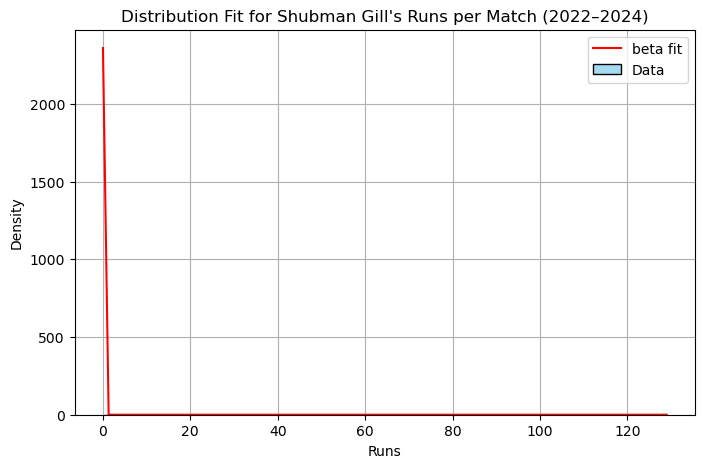

In [341]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'year' from 'Date'
ipl_bbb['Date'] = pd.to_datetime(ipl_bbb['Date'])  # Fix the column name
ipl_bbb['year'] = ipl_bbb['Date'].dt.year

# Aggregate runs per batsman per match
runs = ipl_bbb.groupby(['Striker', 'Match id'])['runs_scored'].sum().reset_index()

# Add year info to the aggregated runs DataFrame
match_years = ipl_bbb[['Match id', 'year']].drop_duplicates()
runs = runs.merge(match_years, on='Match id', how='left')

# Filter Shubman Gill's runs from last 3 years
gill_runs = runs[(runs['Striker'].str.lower().str.strip() == 'shubman gill') &
                 (runs['year'].isin([2022, 2023, 2024]))]

# Function to get best-fitting distribution
def get_best_distribution(data):
    data = data.dropna()
    distributions = [stats.norm, stats.expon, stats.poisson, stats.gamma, stats.beta]
    best_fit = None
    best_p_value = 0

    for dist in distributions:
        try:
            params = dist.fit(data)
            D, p = stats.kstest(data, dist.name, args=params)
            print(f"{dist.name}: p = {p:.4f}")
            if p > best_p_value:
                best_p_value = p
                best_fit = dist.name
        except Exception as e:
            print(f"{dist.name}: Error - {e}")
    
    print(f"✅ Best fit: {best_fit} (p = {best_p_value:.4f})")
    return best_fit

# Run distribution fitting for Shubman Gill
print("\n🎯 Finding best fit distribution for Shubman Gill (2022–2024):")
best_distribution = get_best_distribution(gill_runs['runs_scored'])

# Plot the result
plt.figure(figsize=(8, 5))
sns.histplot(gill_runs['runs_scored'], bins=10, kde=False, stat="density", color='skyblue', label='Data')

if best_distribution:
    dist = getattr(stats, best_distribution)
    params = dist.fit(gill_runs['runs_scored'])
    x = np.linspace(min(gill_runs['runs_scored']), max(gill_runs['runs_scored']), 100)
    plt.plot(x, dist.pdf(x, *params), label=f'{best_distribution} fit', color='red')

plt.title("Distribution Fit for Shubman Gill's Runs per Match (2022–2024)")
plt.xlabel("Runs")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



In [340]:
best_distribution

'beta'

#### 6.Find the relationship between a player’s performance and the salary he gets in your data (Correlation).

In [333]:
#pip install fuzzywuzzy

In [334]:
#!pip install python-Levenshtein

In [335]:
#!pip install --upgrade pip


In [336]:
from fuzzywuzzy import process

# Assuming total_run_each_year is already created
# Filter 2024 run data
R2024 = total_run_each_year[total_run_each_year['year'] == 2024].copy()

# Create a copy of the salary data
df_salary = ipl_salary.copy()

# Fuzzy matching function
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None

# Apply fuzzy matching to link names from salary to run data
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, R2024['Striker'].tolist()))

# Merge the salary and run data
df_merged = pd.merge(df_salary, R2024, left_on='Matched_Player', right_on='Striker')

# Calculate correlation between salary and runs
correlation = df_merged['lakh_rs'].corr(df_merged['runs_scored'])
print("📊 Correlation between Salary and Runs in 2024:", correlation)


📊 Correlation between Salary and Runs in 2024: 0.3061248376582168


In [337]:
df_merged

,Player,Salary,lakh_rs,international,iconic,Matched_Player,year,Striker,runs_scored
0,Abhishek Porel,20 lakh,20,0,NaN,Abishek Porel,2024,Abishek Porel,202
1,Anrich Nortje,6.5 crore,650,1,NaN,A Nortje,2024,A Nortje,4
2,Axar Patel,9 crore,900,0,NaN,AR Patel,2024,AR Patel,149
3,David Warner,6.25 crore,625,1,NaN,TH David,2024,TH David,217
4,Ishant Sharma,50 lakh,50,0,NaN,I Sharma,2024,I Sharma,1
...,...,...,...,...,...,...,...,...,...
106,Sanvir Singh,20 lakh,20,0,NaN,RK Singh,2024,RK Singh,123
107,Shahbaz Ahamad (T),2.4 crore,240,0,NaN,T Stubbs,2024,T Stubbs,277
108,T. Natarajan,3.2 crore,320,0,NaN,T Stubbs,2024,T Stubbs,277
109,Upendra Singh Yadav,25 lakh,25,0,NaN,SA Yadav,2024,SA Yadav,176


In [338]:
# Filter 2024 wicket data
R2024 = total_wicket_each_year[total_wicket_each_year['year'] == 2024].copy()

# Match player names between datasets
df_salary = ipl_salary.copy()

from fuzzywuzzy import process

# Matching function
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None

# Apply fuzzy matching
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, R2024['Bowler'].tolist()))

# Merge salaries with wicket data
df_merged = pd.merge(df_salary, R2024, left_on='Matched_Player', right_on='Bowler')

# Correlation calculation
correlation = df_merged['lakh_rs'].corr(df_merged['wicket_confirmation'])
print("📊 Correlation between Salary and Wickets (2024):", correlation)


📊 Correlation between Salary and Wickets (2024): 0.05693257942146922


In [339]:
df_merged

,Player,Salary,lakh_rs,international,iconic,Matched_Player,year,Bowler,wicket_confirmation
0,Anrich Nortje,6.5 crore,650,1,NaN,A Nortje,2024,A Nortje,7
1,Axar Patel,9 crore,900,0,NaN,AR Patel,2024,AR Patel,9
2,Ishant Sharma,50 lakh,50,0,NaN,I Sharma,2024,I Sharma,8
3,Kuldeep Yadav,2 crore,200,0,NaN,Kuldeep Yadav,2024,Kuldeep Yadav,12
4,Lalit Yadav,65 lakh,65,0,NaN,Lalit Yadav,2024,Lalit Yadav,0
...,...,...,...,...,...,...,...,...,...
76,Shahbaz Ahamad (T),2.4 crore,240,0,NaN,T Natarajan,2024,T Natarajan,13
77,T. Natarajan,3.2 crore,320,0,NaN,T Natarajan,2024,T Natarajan,13
78,Umran Malik,4 crore,400,0,NaN,Umran Malik,2024,Umran Malik,0
79,Upendra Singh Yadav,25 lakh,25,0,NaN,MP Yadav,2024,MP Yadav,8
